# Crime in San Francisco Spikes After Work Hours

For this assignment, I chose to analyze the San Francisco crime data set. I focused on overall crime patterns across time of day and days of the week. I found that crime peaked after work hours, particularly on Thursdays and Fridays.

## Preliminaries
I decided to use R in the Jupyter environment for this assignment. First, I loaded the libraries I am going to use, along with the dataset. I looked at the summary of the data to get a sense of what I was working with.

In [2]:
library(ggplot2)
library(lubridate)
library(RColorBrewer)

Warning message:
: package 'ggplot2' was built under R version 3.2.5Warning message:
: package 'lubridate' was built under R version 3.2.5
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [3]:
dfSF = read.csv('F:/GitHub Repos/datasci_course_materials/assignment6/sanfrancisco_incidents_summer_2014.csv',head=TRUE,sep=",")

In [4]:
summary(dfSF)

   IncidntNum                  Category                            Descript    
 Min.   : 10284385   LARCENY/THEFT :9466   GRAND THEFT FROM LOCKED AUTO: 3766  
 1st Qu.:140545607   OTHER OFFENSES:3567   STOLEN AUTOMOBILE           : 1350  
 Median :140632022   NON-CRIMINAL  :3023   LOST PROPERTY               : 1202  
 Mean   :142017280   ASSAULT       :2882   PETTY THEFT OF PROPERTY     : 1125  
 3rd Qu.:140719664   VEHICLE THEFT :1966   WARRANT ARREST              :  980  
 Max.   :990367398   WARRANTS      :1782   PETTY THEFT FROM LOCKED AUTO:  955  
                     (Other)       :6307   (Other)                     :19615  
     DayOfWeek            Date            Time           PdDistrict  
 Friday   :4451   06/28/2014:  410   12:00  :  784   SOUTHERN :5739  
 Monday   :4005   08/09/2014:  410   00:01  :  661   MISSION  :3700  
 Saturday :4319   08/08/2014:  403   18:00  :  649   NORTHERN :3589  
 Sunday   :4218   06/29/2014:  397   19:00  :  621   CENTRAL  :3513  
 Thursday 

## Preparing the Data
We can see from the data above that there is a "DayOfWeek" column, which we will use to analyze the data by the day of the week. However, "Time" has crimes down to the minute, and this was too fine of a scale for my tastes to get a sense of the data. Therefore I created a new column for the hour the crime was committed:

In [5]:
dfSF$Hour<-hour(as.POSIXlt(dfSF$Time, format="%H:%M"))

Now that the data is in the format I desire, I can start visually looking at the trends. First, I will look at the data by time of day, broken down by the hour column created above.

## Analyzing Crime by Hour
I used ggplot to get a graph of crimes broken down by hour:

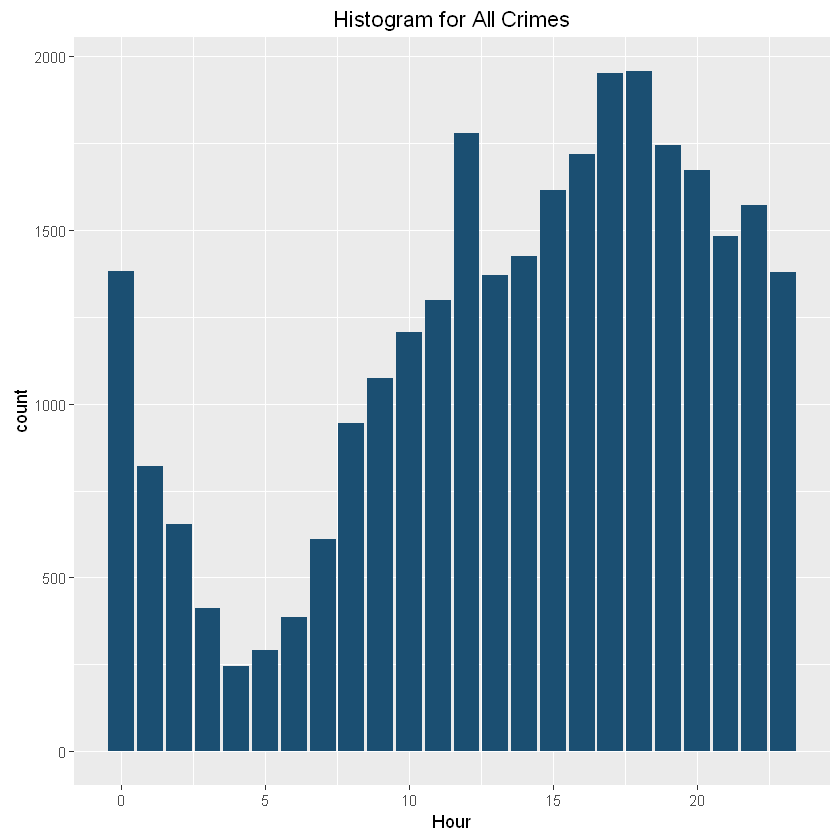

In [13]:
ggplot(dfSF, aes(Hour)) + geom_bar(fill="#1b4f72") + 
labs(title="Histogram for All Crimes")

We can see the highest rates of crimes are between 5PM-7PM. The lowest rates of crimes are early in the morning, between 3AM and 7AM. Now, we will look at the crime data broken down by days of the week.

## Analyzing Crime by Day of Week
I then used ggplots again to graph the crimes broken down by day:

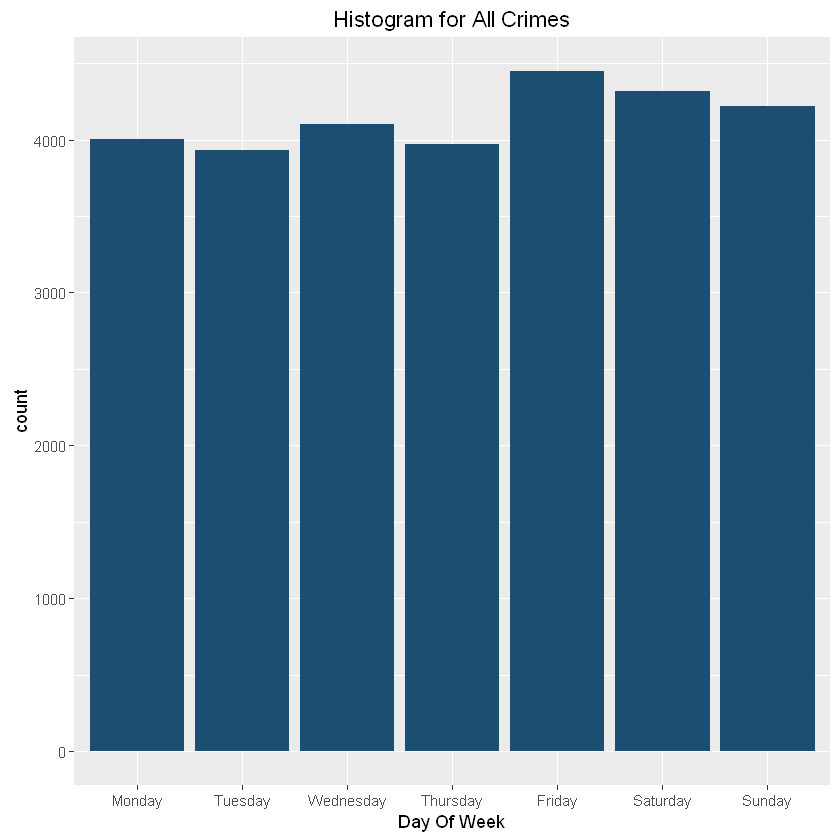

In [7]:
ggplot(dfSF, aes(DayOfWeek)) + geom_bar(fill="#1b4f72") + 
labs(title="Histogram for All Crimes") + 
scale_x_discrete(name ="Day Of Week", limits=c("Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

We can see that crime is fairly evenly distributed across the days of the week, but there is a noticeable uptick in crime on Friday and through the weekend. Perhaps criminals like to go after tourists in San Francisco, the most popular tourist city in America.

## Breaking down Crimes by Both Day of Week and by Hour
Our results so far show some insight, but it would be valuable to see how crimes break down by both days of the week and by hour. For this plot, I looked at the 2D intensity plot of the days of the week Vs time of day:

In [9]:
rf <- colorRampPalette(rev(brewer.pal(11,'Spectral')))
r <- rf(32)
redsf <- colorRampPalette(brewer.pal(9,'Reds'))
reds <- redsf(32)

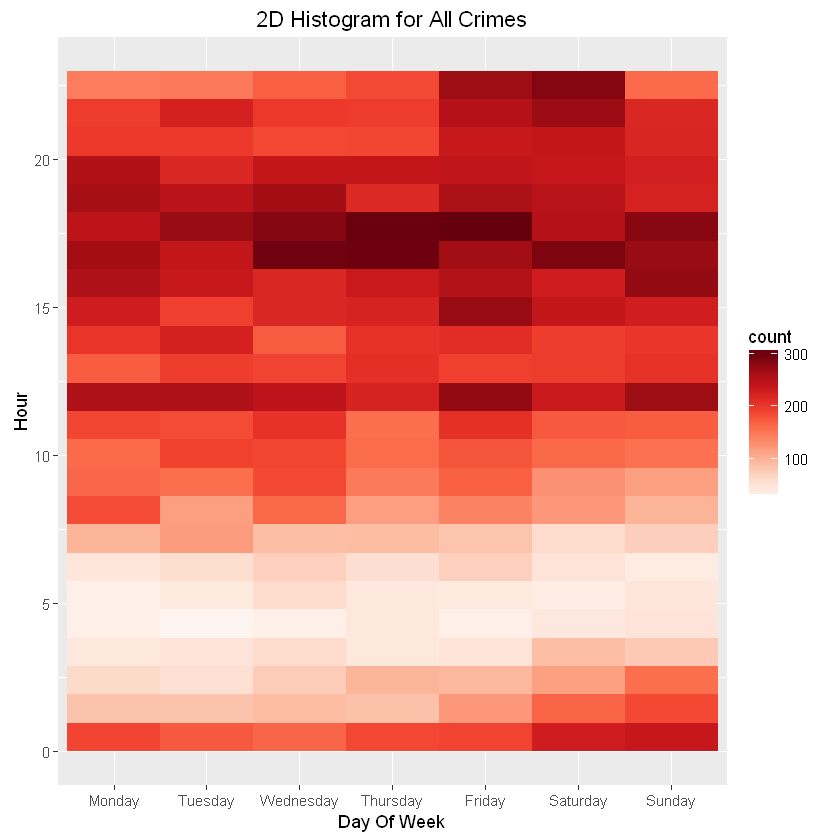

In [10]:
ggplot(dfSF,aes(x=DayOfWeek,y=Hour))+stat_bin2d(bins=24) + 
labs(title="2D Histogram for All Crimes") + 
scale_fill_gradientn(colours=reds) + 
scale_x_discrete(name ="Day Of Week", limits=c("Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

In the plot above, dark red means higher incidence of crime, while white means very low incidence of crime.

This plot shows that crime is correlated with the day of the week and time of day. We can see that crime rates are highest on Thursdays and Fridays from 5PM-7PM. This time corresponds to right after the work day has ended, when people are going home. From the data, it looks like criminals are out en force during that time.

We also see high rates of crime on Friday and Saturday nights, between 10PM-1AM. This corresponds to party nights in the city - crime seems to spike when people are out. It would be interesting to see with further analysis if these times are correlated with increases in drinking-related crimes.

We see that crime is generally low in the morning hours, between 3AM and 7AM. This is likely when people are sleeping, and not many people are out on the streets.

## Conclusion
In my investigation of crime across time of day and day of the week, I found some interesting correlations when looking at the data. Crime is lowest in the wee hours of the morning, and it is highest after work, especially on Thursdays and Fridays. Friday and Saturday nights are also high points of crime. If you are out in San Francisco, watch your wallet after work and when you are out partying!